In [ ]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
data = pd.read_csv('RYANDATA_consolidated.csv')

columns = data.columns
print(columns)

Index(['Unnamed: 0', 'id', 'topic', 'authors', 'title', 'journal', 'year',
       'vol_issue', 'doi'],
      dtype='object')


In [10]:
papers = pd.DataFrame(data['title'])
topic = pd.DataFrame(data['topic'])
author = pd.DataFrame(data['authors'])

In [11]:
print(len(papers))
print(len(topic))
topic.head(2)
papers[0:100]

36622
36622


,title
0,Preparation of adenosine-loaded electrospun na...
1,The adaption of the bony microstructure of the...
2,Effect of caffeine on ovariectomy-induced oste...
3,The effect of formalin preservation time and t...
4,Accurate and efficient plate and rod microfini...
5,The effect of adipose-derived stem cells on en...
6,A biomechanical study of headless compression ...
7,Perforated h-beam implant can be used in femor...
8,In vitro effect of caveolin-1 as a slow-releas...
9,Accumulation of microdamage at complete and in...


In [12]:
topic['topic'].unique()

array(['BONE', 'CARDIO', 'CELLULAR/SUBCELLULAR', 'COMPARATIVE', 'HEAD',
       'ERGONOMICS', 'EVOLUTION/ANTHROPOLOGY', 'GAIT/LOCOMOTION',
       'JOINT/CARTILAGE', 'METHODS', 'MODELING', 'MUSCLE', 'NEURAL',
       'ORTHOPAEDICS/SPINE', 'ORTHOPAEDICS/SURGERY', 'POSTURE/BALANCE',
       'REHABILITATION', 'SPORT/EXERCISE', 'TENDON/LIGAMENT',
       'TISSUE/BIOMATERIAL', 'TRAUMA/IMPACTTESTING',
       'HAND/FINGER/FOOT/TOE', 'PROSTHETICS/ORTHOTICS', 'ROBOTICS'],
      dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

feat = ['topic']
for x in feat:
    le = LabelEncoder()
    le.fit(list(topic[x].values))
    topic[x] = le.transform(list(topic[x]))

In [14]:
topic['topic'].unique()

array([ 0,  1,  2,  3,  8,  4,  5,  6,  9, 10, 11, 12, 13, 14, 15, 16, 18,
       20, 21, 22, 23,  7, 17, 19])

In [15]:
le.inverse_transform([0])[0]

'BONE'

In [16]:
data['everything'] = pd.DataFrame(data['title'] + ' ' + data['authors'])
print(data['everything'].head(5))

0    Preparation of adenosine-loaded electrospun na...
1    The adaption of the bony microstructure of the...
2    Effect of caffeine on ovariectomy-induced oste...
3    The effect of formalin preservation time and t...
4    Accurate and efficient plate and rod microfini...
Name: everything, dtype: object


In [17]:
def change(t):
    t = t.split()
    return ' '.join([(i) for (i) in t if i not in stop])

In [18]:
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
stop.append('The')
stop.append('An')
stop.append('A')
stop.append('Do')
stop.append('Is')
stop.append('In')
stop[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [19]:
data['everything'].apply(change)

0        Preparation adenosine-loaded electrospun nanof...
1        adaption bony microstructure human glenoid cav...
2        Effect caffeine ovariectomy-induced osteoporos...
3        effect formalin preservation time temperature ...
4        Accurate efficient plate rod microfinite eleme...
5        effect adipose-derived stem cells enthesis hea...
6        biomechanical study headless compression screw...
7        Perforated h-beam implant used femoral neck fr...
8        vitro effect caveolin-1 slow-release material ...
9        Accumulation microdamage complete incomplete f...
10       Evaluation ostarine selective androgen recepto...
11       Optimal administration frequency dose teripara...
12       Effect low-intensity pulsed ultrasound autolog...
13       Osteoclast-responsive, injectable bone bisphos...
14       Effect long-term green tea polyphenol suppleme...
15       Adenoviral delivery adiponectin ameliorates os...
16       Novel adhesives sternal fixation stabilization.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=2, max_features=70000, strip_accents='unicode',lowercase =True,
                            analyzer='word', token_pattern=r'\w+', use_idf=True, 
                            smooth_idf=True, sublinear_tf=True, stop_words = 'english')
vectors = vectorizer.fit_transform(data['everything'])
vectors.shape

(36622, 37013)

## Split Data

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
# from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(vectors,
                                                    topic['topic'],
                                                    test_size=0.3,
                                                    random_state = 0)

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

type(papers)

(25635, 37013)
(25635,)
(10987, 37013)
(10987,)


pandas.core.frame.DataFrame

## Multinomial Naive Bayes

In [19]:
clf = MultinomialNB(alpha=.45)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print (metrics.f1_score(y_test, pred, average='macro'))
print (metrics.accuracy_score(y_test, pred))

0.4228136030663107
0.5572039683262037


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Logistic Regression

In [26]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(solver= 'sag',max_iter=500,random_state=0, multi_class='multinomial')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print (metrics.f1_score(y_test, pred, average='macro'))
print (metrics.accuracy_score(y_test, pred))

0.6094449189065595
0.6528624738327113


### Test clf model on string

In [27]:
text = ['neuromechanical effort proxies estimation computational']
text[0] = text[0].lower()
#text = list(text)
s = (vectorizer.transform(text))
#s = vectorizer.fit_transform(df)
print (s.shape)
d = (clf.predict(s))

le.inverse_transform(d)[0]

(1, 37013)


'MODELING'

### Save a model for later

In [61]:
from sklearn.externals import joblib
joblib.dump(clf, 'LogisticRegression.pkl')
print ("Model Saved")

Model Saved


In [ ]:
clf = joblib.load('bestmodel.pkl')
clf

## Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='logistic', alpha=0.00003, batch_size='auto',
                   beta_1=0.9, beta_2=0.999, early_stopping=False,
                   epsilon=1e-08, hidden_layer_sizes=(20,), learning_rate='constant',
                   learning_rate_init=0.003, max_iter=200, momentum=0.9,
                   nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
                   solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
                   warm_start=False)
clf.fit(X_train, y_train) 
pred = clf.predict(X_test)
print (metrics.f1_score(y_test, pred, average='macro'))
print (metrics.accuracy_score(y_test, pred))

In [ ]:
text = ['Calcaneus range of motion underestimated by markers on running shoe heel']
#text = list(text)
s = (vectorizer.transform(text))
#s = vectorizer.fit_transform(df)
print (s.shape)
d = (clf.predict(s))
le.inverse_transform(d)[0]

## Extreme Gradient Boosting CV
### Takes a while and isn't great
https://xgboost.readthedocs.io/en/latest/tutorials/model.html

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test)

In [ ]:
params = {
    'objective':'multi:softmax',
    'eval_metric':'mlogloss',
    'eta':0.025,
    'max_depth':10,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'min_child_weight':5,
    'num_class': 32
    
}

bst = xgb.cv(params, dtrain, num_boost_round=100,
early_stopping_rounds=40, nfold=5, verbose_eval=10)

bst_train = xgb.train(params, dtrain, num_boost_round=5)

p_test = bst_train.predict(dtest)


In [ ]:

print (metrics.f1_score(y_test, p_test, average='macro'))
print (metrics.accuracy_score(y_test, p_test))

## Stochastic Gradient Descent (SGD) learning

In [58]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=500, random_state=0, tol = 1e-3)
sgd.fit(X_train, y_train) 
pred = sgd.predict(X_test)
print (metrics.f1_score(y_test, pred, average='macro'))
print (metrics.accuracy_score(y_test, pred))

0.619754456855235
0.6632383726221899


## Linear SVC

In [60]:
from sklearn.svm import LinearSVC
lsvc =LinearSVC()
lsvc.fit(X_train, y_train) 
pred = lsvc.predict(X_test)
print (metrics.f1_score(y_test, pred, average='macro'))
print (metrics.accuracy_score(y_test, pred))

0.6295352219263523
0.6568672066988259


In [32]:
print(np.size(X_test))
print(np.size(X_train))

214366
500676


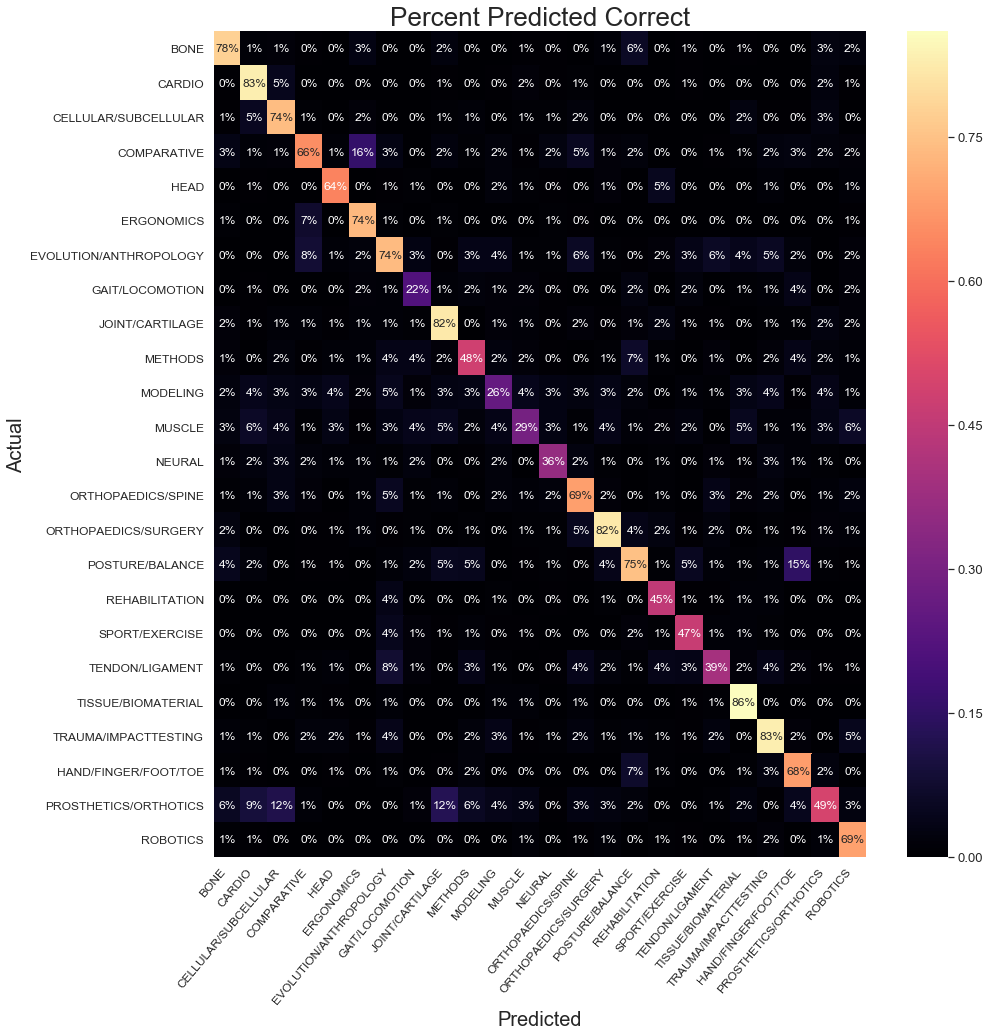

                        precision    recall  f1-score   support

                  BONE       0.72      0.78      0.75       583
                CARDIO       0.69      0.83      0.75       355
  CELLULAR/SUBCELLULAR       0.66      0.74      0.70       353
           COMPARATIVE       0.68      0.66      0.67       702
                  HEAD       0.78      0.64      0.70       163
            ERGONOMICS       0.67      0.74      0.70       302
EVOLUTION/ANTHROPOLOGY       0.61      0.74      0.67       958
       GAIT/LOCOMOTION       0.48      0.22      0.30       139
       JOINT/CARTILAGE       0.68      0.82      0.75       642
               METHODS       0.59      0.48      0.53       408
              MODELING       0.45      0.26      0.33       411
                MUSCLE       0.56      0.29      0.39       384
                NEURAL       0.64      0.36      0.46       205
    ORTHOPAEDICS/SPINE       0.64      0.69      0.66       533
  ORTHOPAEDICS/SURGERY       0.75      

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

data['topic_id'] = data['topic'].factorize()[0]
topic_id_df = data[['topic',
                  'topic_id']].drop_duplicates().sort_values('topic_id')
topic_to_id = dict(topic_id_df.values)
id_to_topic = dict(topic_id_df[['topic_id','topic']].values)

model = sgd

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
plt.rc('xtick',labelsize = 20)
plt.rc('ytick',labelsize = 20)
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_rowsum = [sum(row) for row in conf_mat]
conf_mat_perc = conf_mat / conf_mat_rowsum
fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale=1.2) #font size multiplier
sns.heatmap(conf_mat_perc, annot=True, fmt='.0%', cmap = 'magma', annot_kws={"size": 12},
            xticklabels=topic_id_df.topic.values, yticklabels=topic_id_df.topic.values)

plt.ylabel('Actual',fontsize = 20)
plt.xlabel('Predicted',fontsize = 20)
plt.yticks(size = 12)
plt.xticks(size = 12, rotation=50,ha='right')
plt.title('Percent Predicted Correct', fontsize = 26)
plt.yticks( rotation='horizontal')
fig.tight_layout(pad = 2)
plt.show()

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=data['topic'].unique()))

In [56]:
print(conf_mat_rowsum) #number of papers per category

[583, 355, 353, 702, 163, 302, 958, 139, 642, 408, 411, 384, 205, 533, 734, 954, 124, 172, 356, 322, 865, 453, 671, 198]


# TEST  MODEL ON NEW PAPERS FROM THIS WEEK

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorize strings for ML algorithms
vectorizer = TfidfVectorizer(min_df=2, max_features=70000, strip_accents='unicode',lowercase =True,
                            analyzer='word', token_pattern=r'\w+', use_idf=True, 
                            smooth_idf=True, sublinear_tf=True, stop_words = 'english')

#import this week's literature update (from literature_search.ipynb)
titles = pd.read_csv('literature_update.csv', names  = ['title'])
titles['title_clean'] = titles['title'].apply(change) #removes endwords
vectors = vectorizer.fit_transform(data['everything'])

new_vectors = vectorizer.transform(titles['title_clean'])

np.size(titles,0) #lets see the titles for this week!


150

In [25]:
from sklearn.externals import joblib
#load model you want to apply
model = joblib.load('LinearSVC.pkl')
#let's re-fit Linear SVC to all data from biomch-l
# model.fit(vectors,topic['topic'])
print(np.size(topic['topic'],0))
topic_predictions = model.predict(new_vectors)

titles['topic_pred'] = le.inverse_transform(topic_predictions)
titles

titles[['title','topic_pred']].to_csv('literature_update_topics.csv')

36622


# Deep Learning
## https://github.com/akshaybhatia10/Book-Genre-Classification/blob/master/README.md
### RNN_LSTM_using_Glove_vectors

In [ ]:
import numpy as np
import pandas as pd
import re
import tensorflow as tf

## loading 400,000 words/vectors

In [ ]:
wordsList = np.load('wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('wordVectors.npy')
print ('Loaded the word vectors!')

In [ ]:
print (wordsList[:100])
print (len(wordsList))

In [ ]:
data = pd.read_csv('RYANDATA_consolidated.csv')
columns = data.columns

papers = pd.DataFrame(data['title'])
topic = pd.DataFrame(data['topic'])
author = pd.DataFrame(data['authors'])

print(papers.head())
print(topic.head())

In [ ]:
print(len((topic['topic'].unique())))
print((topic['topic'].unique()))

In [ ]:
numPapers = (len(papers))
numTopics = (len(topic))
print(numPapers)
print(numTopics)

In [ ]:
aWordIndex = wordsList.index('biomechanics') #see if a word exists!
print (aWordIndex)
print (wordVectors[aWordIndex])
print (wordVectors[aWordIndex].shape)

In [ ]:
import tensorflow as tf
maxSeqLength = 10 #Maximum length of sentence
numDimensions = 300 #Dimensions for each word vector
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("too")
firstSentence[2] = wordsList.index("had")
firstSentence[3] = wordsList.index("a")
firstSentence[4] = wordsList.index("love")
firstSentence[5] = wordsList.index("story")
#firstSentence[6] = wordsList.index("k")
#firstSentence[7] = wordsList.index("ki")
print(firstSentence.shape)
print(firstSentence) #Shows the row index for each word

In [ ]:
with tf.Session() as sess:
    print("Word vector for a single word", tf.nn.embedding_lookup(wordVectors, firstSentence).eval()[0])
    print("\n")
    print("Dimension for a single word", tf.nn.embedding_lookup(wordVectors, firstSentence).eval()[0].shape)
    print ('\n')
    print("Shape of the vector for this sentence", tf.nn.embedding_lookup(wordVectors, firstSentence).eval().shape)
    print ("\n")
    print("Vector for this sentence", tf.nn.embedding_lookup(wordVectors, firstSentence).eval())

In [ ]:
numWords = []
for i,j in enumerate(papers['title']):
    counter = len(j.split())
    numWords.append(counter)  
    
print('The total number of words in all papers titles is', sum(numWords))
print('The average number of words in the each paper title is', sum(numWords)/len(numWords))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(numWords, 40)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
# plt.axis([0, 40, 0, 3000])
plt.title('number of words per title')
plt.show()

#so we set a max length larger than average 
maxSeqLength = 25

In [ ]:
# Removes punctuation, parentheses, question marks, etc., and 
# leaves only alphanumeric characters
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

print (papers['title'][0])
print (cleanSentences(papers['title'][0]))
print ('\n')
print (papers['title'][500])
print (cleanSentences(papers['title'][500]))
print ('\n')
print (papers['title'][1000])
print (cleanSentences(papers['title'][1000]))
print ('\n')
print (papers['title'][1500])
print (cleanSentences(papers['title'][1500]))
print ('\n')
print (papers['title'][2000])
print (cleanSentences(papers['title'][2000]))


In [ ]:
%%time
features = np.zeros((numPapers, maxSeqLength), dtype='int32')

fileCounter = 0

for i,j in enumerate(papers['title']): 
    indexCounter = 0
    cleanedLine = cleanSentences(j)
    split = cleanedLine.split()
    for word in split:
        try:
            features[fileCounter][indexCounter] = wordsList.index(word)
        except ValueError:
            features[fileCounter][indexCounter] = 399999 #Vector for unkown words
        indexCounter = indexCounter + 1
        if indexCounter >= maxSeqLength:
            break
    fileCounter = fileCounter + 1 

np.save('idsMatrix25', features)

In [ ]:
#to load features
features = np.load('idsMatrix25.npy')

In [ ]:
features.shape


In [ ]:
print (papers['title'][100]) #first paper title
features[100]

In [ ]:
#convert topic (labels) usign LabelEncoder 
from sklearn.preprocessing import LabelEncoder

feat = ['topic']
for x in feat:
    le = LabelEncoder()
    le.fit(list(topic[x].values))
    topic[x] = le.transform(list(topic[x]))
    
from keras.utils.np_utils import to_categorical #categorical variables (labels)
target = to_categorical(topic['topic'], 32)
target.shape

In [ ]:
import scipy as sp
# define hyperparameters
batchSize = 64
lstmUnits = 2
numClasses = 32
iterations = 10
numDimensions = 25

#helper function to get batches
def get_batches(x, y, batch_size=100):
    
    n_batches = x.shape[0]//batch_size
    x, y = x[:n_batches*batch_size], y[:n_batches*batch_size]
    for ii in range(0, x.shape[0], batch_size):
        yield x[ii:ii+batch_size], y[ii:ii+batch_size]

### Model

In [ ]:
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

#embed layer
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors, input_data)

#tensorflow magic
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.50)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)

### Training

In [ ]:
%%time
sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

for i in range(iterations):
    #Next Batch of reviews
    for ii, (x, y) in enumerate(get_batches(X_train, y_train, batch_size = batchSize)):
        sess.run(optimizer, {input_data: x, labels: y})
        #acc,loss = sess.run([accuracy,loss], {input_data: x, labels: y})
    print("Loss for {} epoch: {}".format(i, (sess.run(loss, {input_data: x, labels: y}))))    
    print("Accuracy for {} epoch: {}".format(i, (sess.run(accuracy, {input_data: x, labels: y})) * 100))
    
save_path = saver.save(sess, "models/test.ckpt", global_step=i)    

# broke.

### go to https://github.com/akshaybhatia10/Book-Genre-Classification/blob/master/README.md for help